In [10]:
import pandas as pd
# Reading file into data frame
wine_data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

Test for presence any missing attribute/target values and impute as necessary.

In [11]:
# Test for presence any missing attribute/target values and impute as necessary.
wine_data["Type"].fillna("Red", inplace = True)
wine_data["Alcohol_flag"].fillna("High", inplace = True)
wine_data["Sugar_flag"].fillna("High", inplace = True)

Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode only the categoric or boolean attributes
for i in range(0, wine_data.shape[1]):
    if wine_data.dtypes[i]=='object' or wine_data.dtypes[i]=='bool':
        encoded_wineDF[wine_data.columns[i]] = le.fit_transform(wine_data[wine_data.columns[i]])



print("-=========================")
print(wine_data)
print("-=========================")
encoded_wineDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Create contingency tables (cross tabulations) for:
a. Type vs. alcohol content
b. Type vs. Sugar content


In [13]:
# Type versus Alcohol

alcohol_crosstab = pd.crosstab(wine_data.Type, wine_data.Alcohol_flag)

print(alcohol_crosstab)


Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


In [14]:
# Type versus Sugar

sugar_crosstab = pd.crosstab(wine_data.Type, wine_data.Sugar_flag)

print(sugar_crosstab)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


Plot the two cross tabulations obtained in Step 5.

<Axes: xlabel='Type'>

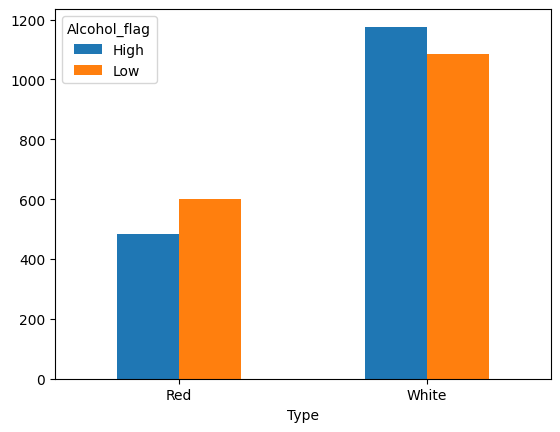

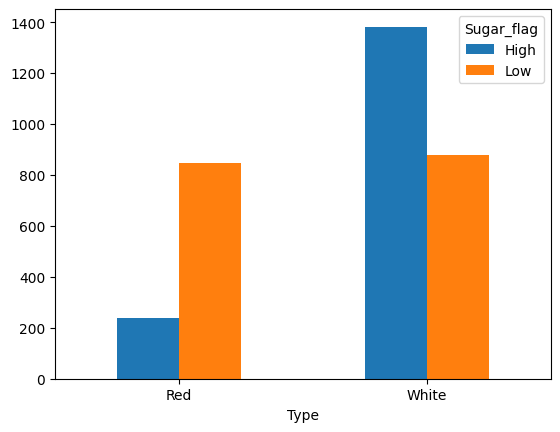

In [15]:
alcohol_crosstab.plot.bar(rot=0)
sugar_crosstab.plot.bar(rot=0)

Use the tables from the previous step to calculate:
a. The prior probability of Type = Red and Type = White.
b. The probability of high and low alcohol content.
c. The probability of high and low sugar content.
d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

In [16]:
# a. the prior probability of Type = Red and Type = White.
#p(White) = 0.5
#p(Red) = 0.5

# b. The probability of high and low alcohol content.
# High = 0.49656203
# Low = 0.50343797
# c. The probability of high and low sugar content.
# High = 0.48400598
# Low = 0.51599402
# d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
# High = 0.44700461
# Low = 0.55299539
# e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
# High = 0.21843318
# Low = 0.78156682

Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.

In [17]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

# Create a Gaussian NB Classifier. Note that each NB algorithm expects different types of data.
#   MultinomialNB → Applied to text data.
#   BernoulliNB → When you have binary features.
#   GaussianNB → When you have continuous features (more of a generic classifier)
#   CategoricalNB → When you have categorical data.

NBmodel = GaussianNB()

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
411              1           1
754              0           1
522              1           0
277              0           0
3128             0           0
...            ...         ...
2348             1           1
3227             0           1
2209             1           1
11               1           1
2688             0           1

[2174 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1335             0           1
828              0           0
1599             1           0
463              1           1
1423             0           1
...            ...         ...
2670             0           0
2124             1           0
2057             1           0
3240             0           0
1110             1           1

[1171 rows x 2 columns]


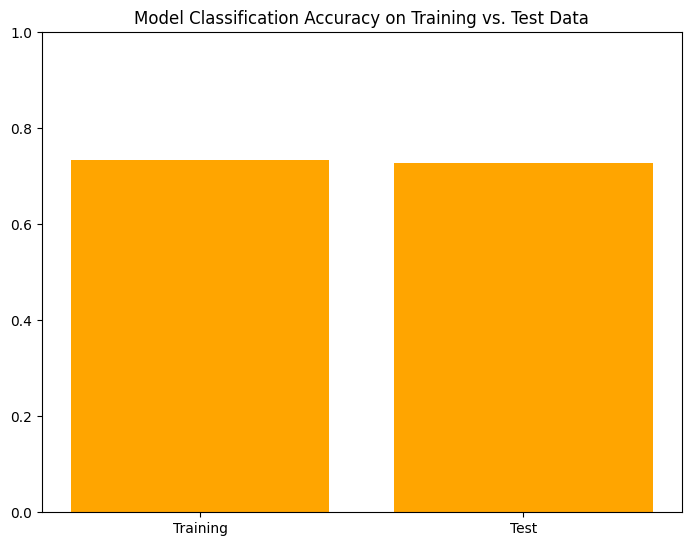

In [18]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()